In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow
from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!curl -L "https://universe.roboflow.com/ds/P40xt15zFR?key=r0kG6YDBJl" > roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2687      0 --:--:-- --:--:-- --:--:--  2695
100  369M  100  369M    0     0  66.5M      0  0:00:05  0:00:05 --:--:-- 81.3M


In [ ]:
!mkdir -p /content/drive/MyDrive/roboflow_dataset
%cd /content/drive/MyDrive/roboflow_dataset

# Replace with your actual link
!curl -L "https://universe.roboflow.com/ds/P40xt15zFR?key=r0kG6YDBJl" > roboflow.zip
!unzip roboflow.zip


Streaming output truncated to the last 5000 lines.
 extracting: train/labels/427eefab-SABZI_MOHAMADAMIN_2020-06-24195647_jpg.rf.8bae8c801e172a3976eaa35270758d3a.txt  
 extracting: train/labels/427eefab-SABZI_MOHAMADAMIN_2020-06-24195647_jpg.rf.cb0bc303f46153ed233772ba647de438.txt  
 extracting: train/labels/427eefab-SABZI_MOHAMADAMIN_2020-06-24195647_jpg.rf.e3ebeb4c5fac05bd16ca8c334c4da669.txt  
 extracting: train/labels/43451909-ASGHARI_MALIHEH_2020-02-19182557_bmp_jpg.rf.0632ca915303eadbd13f85f91d5febc4.txt  
 extracting: train/labels/43451909-ASGHARI_MALIHEH_2020-02-19182557_bmp_jpg.rf.1b9be480dd28f67fc697fdf466a3780b.txt  
 extracting: train/labels/43451909-ASGHARI_MALIHEH_2020-02-19182557_bmp_jpg.rf.1c36dc1afa81605004a406a7eeaed8e5.txt  
 extracting: train/labels/43451909-ASGHARI_MALIHEH_2020-02-19182557_bmp_jpg.rf.270d43cd92c8b4daf5322c7eb103496a.txt  
 extracting: train/labels/43451909-ASGHARI_MALIHEH_2020-02-19182557_bmp_jpg.rf.402a5f82029a98370498034327d423f2.txt  
 extracting

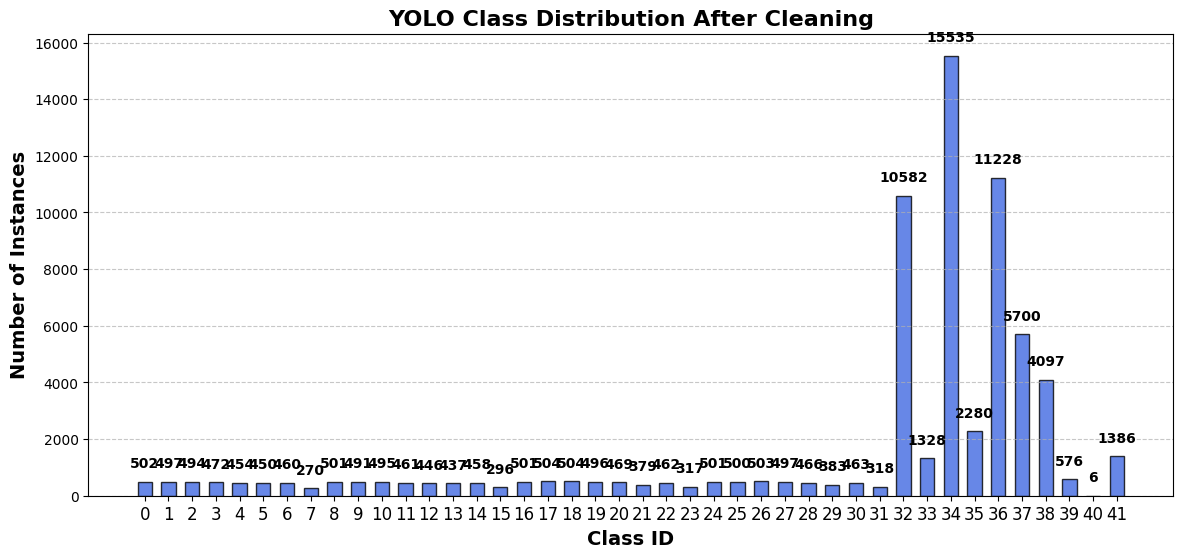

📊 Updated Class Distribution: Counter({34: 15535, 36: 11228, 32: 10582, 37: 5700, 38: 4097, 35: 2280, 41: 1386, 33: 1328, 39: 576, 17: 504, 18: 504, 26: 503, 0: 502, 8: 501, 16: 501, 24: 501, 25: 500, 1: 497, 27: 497, 19: 496, 10: 495, 2: 494, 9: 491, 3: 472, 20: 469, 28: 466, 30: 463, 22: 462, 11: 461, 6: 460, 14: 458, 4: 454, 5: 450, 12: 446, 13: 437, 29: 383, 21: 379, 31: 318, 23: 317, 15: 296, 7: 270, 40: 6})
Total Bounding Boxes: 67165


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define the path to your labels folder
labels_dir = r"/content/drive/MyDrive/roboflow_dataset/train/labels"  # Change to your actual path

# Initialize class counter
class_counts = Counter()

# Loop through all label files
for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):  # Process only YOLO label files
        with open(os.path.join(labels_dir, label_file), "r") as file:
            for line in file:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1  # Count occurrences

# Sort class IDs and counts
sorted_classes = sorted(class_counts.keys())
sorted_counts = [class_counts[c] for c in sorted_classes]

# Dynamically adjust bar width based on number of classes
bar_width = 0.8  # Default width
if len(sorted_classes) > 10:
    bar_width = 0.6  # Reduce width if too many classes

# Convert class IDs to a NumPy array for precise positioning
x_positions = np.arange(len(sorted_classes))

# Improved plot design with dynamic bar width
plt.figure(figsize=(14, 6))
bars = plt.bar(x_positions, sorted_counts, width=bar_width, color="royalblue", edgecolor="black", alpha=0.8)

# Add value labels on top of bars
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, str(count), ha="center", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Class ID", fontsize=14, fontweight="bold")
plt.ylabel("Number of Instances", fontsize=14, fontweight="bold")
plt.title("YOLO Class Distribution After Cleaning", fontsize=16, fontweight="bold")

# Customize x-axis
plt.xticks(x_positions, sorted_classes, fontsize=12)

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Print updated distribution
print("📊 Updated Class Distribution:", class_counts)
print("Total Bounding Boxes:", sum(class_counts.values()))

In [ ]:
import os

# Define paths
labels_dir = r"/content/drive/MyDrive/roboflow_dataset/train/labels"  # Change this to your labels folder path

# Classes to remove (less than 1200 instances)
classes_to_remove = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,40,41}

# Loop through all label files
for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):  # Process only YOLO label files
        label_path = os.path.join(labels_dir, label_file)

        # Read the file and filter out unwanted classes
        with open(label_path, "r") as file:
            lines = file.readlines()

        filtered_lines = [line for line in lines if int(line.split()[0]) not in classes_to_remove]

        # Overwrite the file with filtered content
        with open(label_path, "w") as file:
            file.writelines(filtered_lines)

print("✅ Cleaning complete! Low-frequency classes have been removed.")

✅ Cleaning complete! Low-frequency classes have been removed.


In [ ]:
import os

# Define paths
valid_labels_dir = r"/content/drive/MyDrive/roboflow_dataset/valid/labels"
test_labels_dir = r"/content/drive/MyDrive/roboflow_dataset/test/labels"
classes_to_remove = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,40,41}  # Change this to match the classes you removed

def clean_labels(label_dir):
    for label_file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, label_file)

        with open(file_path, "r") as f:
            lines = f.readlines()

        # Filter out unwanted class IDs
        new_lines = [line for line in lines if int(line.split()[0]) not in classes_to_remove]

        # Save back if changes were made
        if len(new_lines) < len(lines):
            with open(file_path, "w") as f:
                f.writelines(new_lines)

# Apply to validation and test sets
clean_labels(valid_labels_dir)
clean_labels(test_labels_dir)

print("✅ Unwanted classes removed from validation & test labels!")

✅ Unwanted classes removed from validation & test labels!


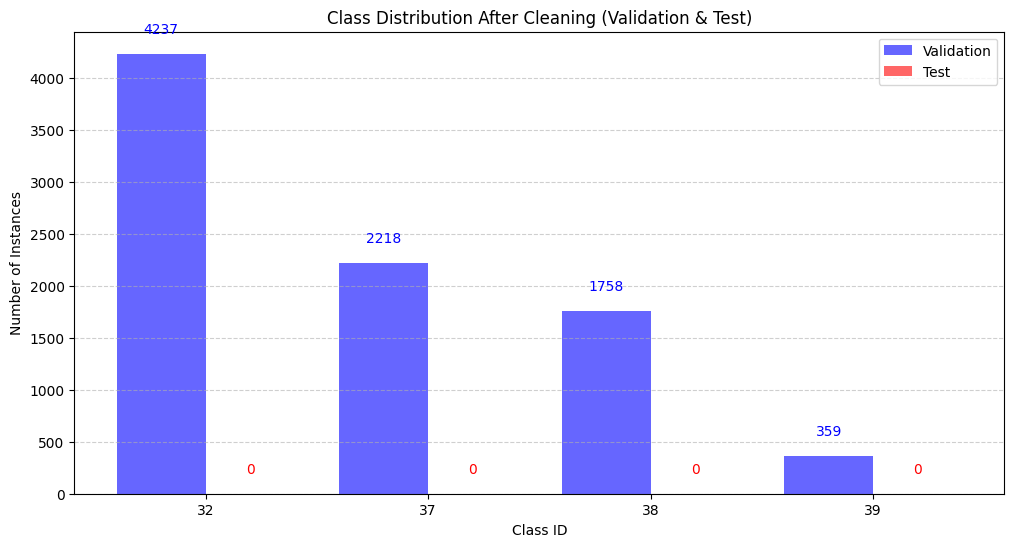

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Define paths to labels
valid_labels_dir = r"/content/drive/MyDrive/roboflow_dataset/valid/labels"
test_labels_dir = r"/content/drive/MyDrive/roboflow_dataset/test/labels"

# Function to count class occurrences
def count_classes(label_dir):
    class_counts = Counter()
    for label_file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, label_file)
        with open(file_path, "r") as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1
    return class_counts

# Count classes in validation and test sets
valid_counts = count_classes(valid_labels_dir)
test_counts = count_classes(test_labels_dir)

# Combine results for visualization
all_classes = set(valid_counts.keys()).union(set(test_counts.keys()))
valid_values = [valid_counts.get(c, 0) for c in sorted(all_classes)]
test_values = [test_counts.get(c, 0) for c in sorted(all_classes)]
labels = sorted(all_classes)

# Plot bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(labels))

plt.bar(x, valid_values, width=bar_width, color='blue', alpha=0.6, label="Validation")
plt.bar([i + bar_width for i in x], test_values, width=bar_width, color='red', alpha=0.6, label="Test")

plt.xlabel("Class ID")
plt.ylabel("Number of Instances")
plt.title("Class Distribution After Cleaning (Validation & Test)")
plt.xticks([i + bar_width / 2 for i in x], labels)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show values on top of bars
for i, v in enumerate(valid_values):
    plt.text(i, v + 200, str(v), ha='center', fontsize=10, color='blue')

for i, v in enumerate(test_values):
    plt.text(i + bar_width, v + 200, str(v), ha='center', fontsize=10, color='red')

plt.show()


In [ ]:
import os

# Paths
img_dir = "/content/drive/MyDrive/roboflow_dataset/test/images"
lbl_dir = "/content/drive/MyDrive/roboflow_dataset/test/labels"

# Supported image extensions
img_exts = ['.jpg', '.jpeg', '.png']

# Count for summary
removed_count = 0

# Loop through label files
for label_file in os.listdir(lbl_dir):
    if not label_file.endswith('.txt'):
        continue

    label_path = os.path.join(lbl_dir, label_file)

    # Check if label is empty
    if os.path.getsize(label_path) == 0:
        # Get corresponding image file name
        base_name = os.path.splitext(label_file)[0]
        for ext in img_exts:
            image_path = os.path.join(img_dir, base_name + ext)
            if os.path.exists(image_path):
                os.remove(image_path)
                print(f"🗑️ Removed image: {image_path}")
                break

        # Remove the empty label file
        os.remove(label_path)
        print(f"🗑️ Removed empty label: {label_path}")
        removed_count += 1

print(f"\n✅ Done. Removed {removed_count} empty label-image pairs.")


🗑️ Removed image: /content/drive/MyDrive/roboflow_dataset/test/images/train_15_png_jpg.rf.b3a03afbda37e7756e73da483cf01c4e.jpg
🗑️ Removed empty label: /content/drive/MyDrive/roboflow_dataset/test/labels/train_15_png_jpg.rf.b3a03afbda37e7756e73da483cf01c4e.txt
🗑️ Removed image: /content/drive/MyDrive/roboflow_dataset/test/images/train_214_png_jpg.rf.c41d0facb24af6ef81b04f65d05aace4.jpg
🗑️ Removed empty label: /content/drive/MyDrive/roboflow_dataset/test/labels/train_214_png_jpg.rf.c41d0facb24af6ef81b04f65d05aace4.txt
🗑️ Removed image: /content/drive/MyDrive/roboflow_dataset/test/images/train_215_png_jpg.rf.a80e68ede3f67e37924508a6f8142416.jpg
🗑️ Removed empty label: /content/drive/MyDrive/roboflow_dataset/test/labels/train_215_png_jpg.rf.a80e68ede3f67e37924508a6f8142416.txt
🗑️ Removed image: /content/drive/MyDrive/roboflow_dataset/test/images/train_224_png_jpg.rf.fc8ef165f047185c1abb7c4607583ad6.jpg
🗑️ Removed empty label: /content/drive/MyDrive/roboflow_dataset/test/labels/train_224_pn

In [ ]:
import os

# Settings
label_dir = '/content/drive/MyDrive/roboflow_dataset/valid/labels'  # Path to your label files
old_class_id = '32'         # The class you want to replace
new_class_id = '0'          # The new class id you want to use

# Go through all txt files in the label directory
for filename in os.listdir(label_dir):
    if filename.endswith('.txt'):
        file_path = os.path.join(label_dir, filename)

        with open(file_path, 'r') as file:
            lines = file.readlines()

        new_lines = []
        for line in lines:
            parts = line.strip().split()
            if parts[0] == old_class_id:
                parts[0] = new_class_id
            new_lines.append(' '.join(parts))

        # Overwrite the file with updated content
        with open(file_path, 'w') as file:
            file.write('\n'.join(new_lines))

print("✅ Class IDs updated.")


✅ Class IDs updated.


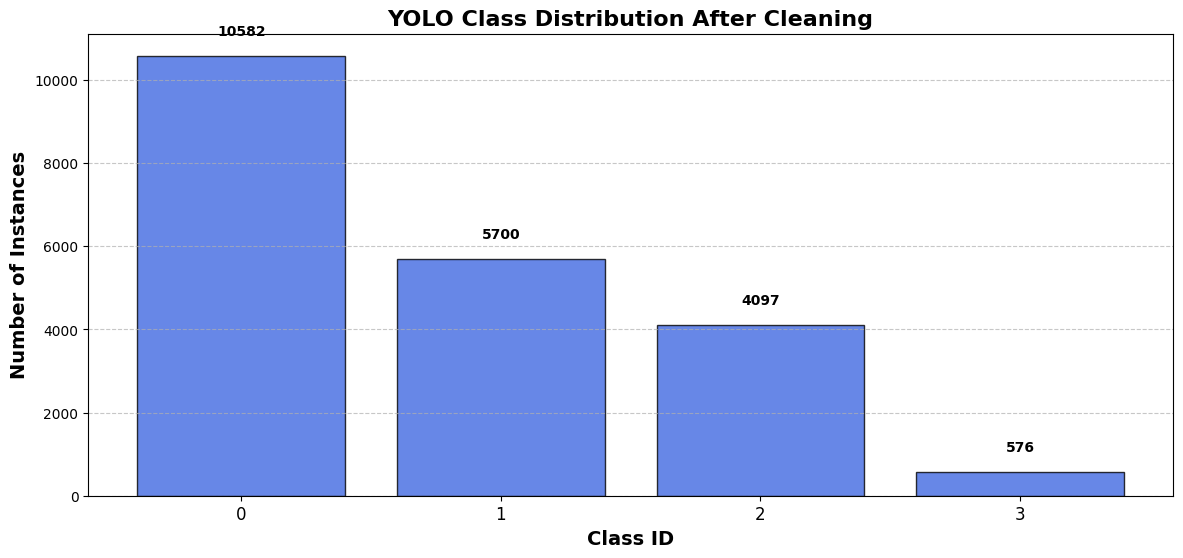

📊 Updated Class Distribution: Counter({0: 10582, 1: 5700, 2: 4097, 3: 576})
Total Bounding Boxes: 20955


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define the path to your labels folder
labels_dir = r"/content/drive/MyDrive/roboflow_dataset/train/labels"  # Change to your actual path

# Initialize class counter
class_counts = Counter()

# Loop through all label files
for label_file in os.listdir(labels_dir):
    if label_file.endswith(".txt"):  # Process only YOLO label files
        with open(os.path.join(labels_dir, label_file), "r") as file:
            for line in file:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1  # Count occurrences

# Sort class IDs and counts
sorted_classes = sorted(class_counts.keys())
sorted_counts = [class_counts[c] for c in sorted_classes]

# Dynamically adjust bar width based on number of classes
bar_width = 0.8  # Default width
if len(sorted_classes) > 10:
    bar_width = 0.6  # Reduce width if too many classes

# Convert class IDs to a NumPy array for precise positioning
x_positions = np.arange(len(sorted_classes))

# Improved plot design with dynamic bar width
plt.figure(figsize=(14, 6))
bars = plt.bar(x_positions, sorted_counts, width=bar_width, color="royalblue", edgecolor="black", alpha=0.8)

# Add value labels on top of bars
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, str(count), ha="center", fontsize=10, fontweight="bold")

# Labels and title
plt.xlabel("Class ID", fontsize=14, fontweight="bold")
plt.ylabel("Number of Instances", fontsize=14, fontweight="bold")
plt.title("YOLO Class Distribution After Cleaning", fontsize=16, fontweight="bold")

# Customize x-axis
plt.xticks(x_positions, sorted_classes, fontsize=12)

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Print updated distribution
print("📊 Updated Class Distribution:", class_counts)
print("Total Bounding Boxes:", sum(class_counts.values()))